In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import sys 
sys.path.append("../../")

mu = -0.01
tau = 0.1
sigma = 5.

mu_p = max(mu,0)

def mvar(n):
  return tau**2 + sigma**2/n

def production_function(n):
  return tau**2/(np.sqrt(2*np.pi*mvar(n))) * np.exp(-mu**2 * mvar(n)/(2* tau**4)) + mu*norm.cdf(mu*np.sqrt(mvar(n))/tau**2) - mu_p


Text(0.5, 1.0, 'Zoomed in')

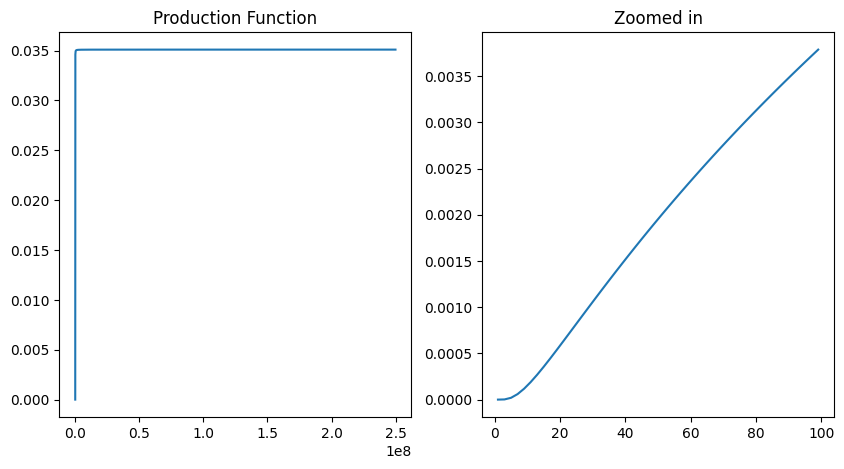

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ns = np.arange(1,250e6,step = 1e5)
#ns = np.arange(1,1e9)
ax1.plot(ns, production_function(ns))
ax1.set_title(f"Production Function")


ns = np.arange(1,100,2)
ax2.plot(ns, production_function(ns))
ax2.set_title(f"Zoomed in")

## Different prod functions

In [15]:
from scipy import stats
from methods.production_functions import *


ns = np.linspace(1, 200, 100)
prod_fcn_vals = np.zeros_like(ns)
sigma = 10

test_atoms = np.array([-5, 1])
test_weights = np.array([0.8, 0.2])

from tqdm import tqdm

for i in tqdm(range(len(ns))):
    prod_fcn_vals[i] = evaluate_production_function(ns[i], (test_atoms, test_weights), sigma, 400_000)

100%|██████████| 100/100 [00:06<00:00, 16.37it/s]


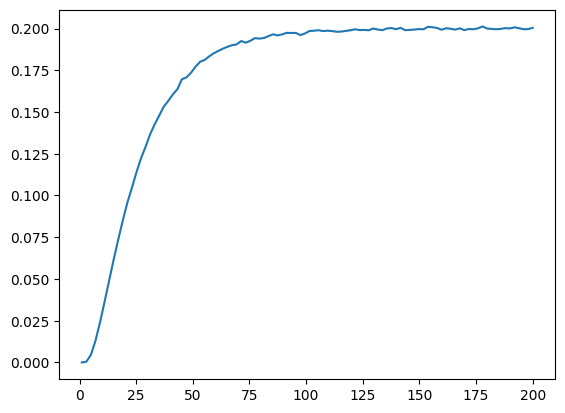

In [16]:
plt.plot(ns, prod_fcn_vals)

## Dynamic Programming

In [20]:

def production_function(n):
  return tau**2/(np.sqrt(2*np.pi*mvar(n))) * np.exp(-mu**2 * mvar(n)/(2* tau**4)) + mu*norm.cdf(mu*np.sqrt(mvar(n))/tau**2) - mu_p

def optimal_production_DP_simple(N,I):
    N_range = np.arange(1,N+1,1)
    I_range = np.arange(1,I+1,1)


    opt_vals = np.zeros((len(I_range), len(N_range)))
    opt_vals[:,0] = production_function(1) + (I_range-1)*mu_p
    opt_vals[0,:] = production_function(N_range)

    allocation = np.zeros((len(I_range), len(N_range)))
    allocation[:,0] = 1
    allocation[0,:] = N_range

    ## DP iteration
    for i in range(1,len(I_range)):
        for n in range(1,len(N_range)):       
            vals = opt_vals[i-1,n-np.arange(n+1)] + production_function(np.arange(n+1))
            opt_vals[i,n] = np.max(vals)
            allocation[i,n] = np.argmax(vals)


    return opt_vals, allocation

In [21]:
opt_vals, allocation = optimal_production_DP_simple(1000,7)

/var/folders/gc/wdmtwr2d6zd6mgxqyn23rjmc0000gn/T/ipykernel_14847/606573403.py:15: RuntimeWarning: divide by zero encountered in divide
  return tau**2 + sigma**2/n


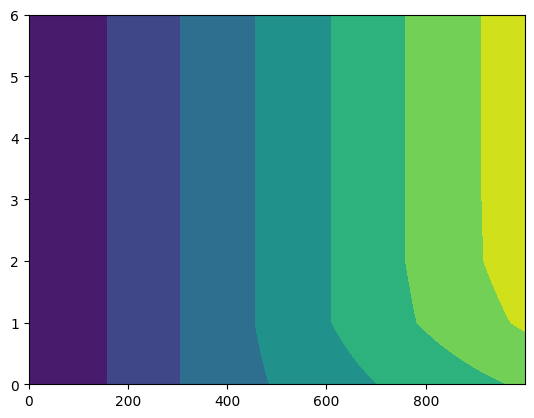

In [22]:
plt.contourf(opt_vals)

In [23]:
### back out the optimal allocation

opt_alloc = np.zeros(allocation.shape[0])
running_N = int(allocation.shape[1] - 1)
for i in range(allocation.shape[0])[::-1]:
    opt_alloc[i] = allocation[i, running_N]
    running_N = running_N - int(allocation[i, running_N])

print(opt_alloc)

[250. 250. 250. 250.   0.   0.   0.]
